In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 40s 0us/step


In [3]:
def create_model(optimizer='adam', dropout_rate=0.3):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(2, 2),
        Dropout(dropout_rate),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(dropout_rate),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [4]:
model = create_model(optimizer='adam', dropout_rate=0.4)
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=64)


c:\Users\bhara\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.2536 - loss: 1.9893 - val_accuracy: 0.4839 - val_loss: 1.4521
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.4674 - loss: 1.4675 - val_accuracy: 0.5542 - val_loss: 1.2791
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.5226 - loss: 1.3367 - val_accuracy: 0.5953 - val_loss: 1.1873
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.5477 - loss: 1.2689 - val_accuracy: 0.6231 - val_loss: 1.1020
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.5696 - loss: 1.2059 - val_accuracy: 0.6381 - val_loss: 1.0551
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.5848 - loss: 1.1687 - val_accuracy: 0.6190 - val_loss: 1.1043
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.5992 - loss: 1.1292 - val_accuracy: 0.6464 - val_loss: 1.0412
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6188 - loss: 1.0810 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6795 - loss: 0.9387
Test Accuracy: 0.68
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


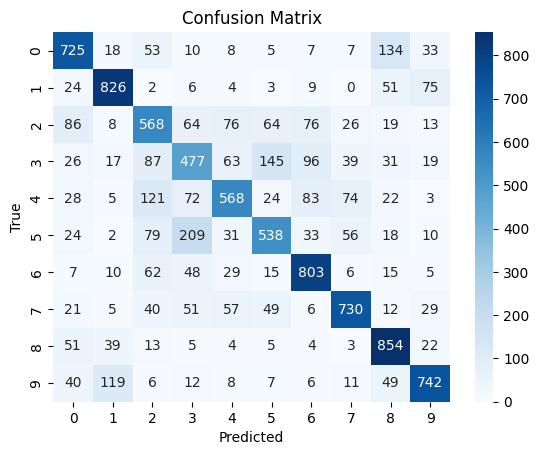

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1000
           1       0.79      0.83      0.81      1000
           2       0.55      0.57      0.56      1000
           3       0.50      0.48      0.49      1000
           4       0.67      0.57      0.61      1000
           5       0.63      0.54      0.58      1000
           6       0.72      0.80      0.76      1000
           7       0.77      0.73      0.75      1000
           8       0.71      0.85      0.77      1000
           9       0.78      0.74      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [5]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

# Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred_classes))


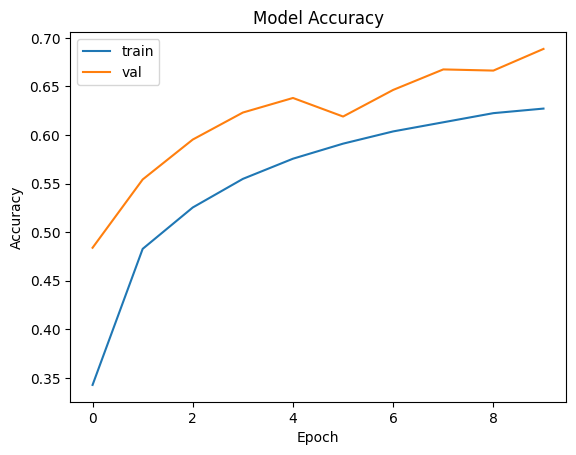

In [6]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
